<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,70.619477,90.653070,61.634445,232.906993,171.435498,61.471495
1,0.0,1.0,94.106683,68.341107,122.071000,294.518790,175.901437,118.617354
2,0.0,2.0,98.038949,57.298054,-6.411838,158.925166,170.652569,-11.727403
3,0.0,3.0,80.736456,96.313032,-23.322335,163.727152,185.890297,-22.163145
4,0.0,4.0,85.104538,38.837748,50.939961,184.882248,142.961816,41.920432
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.843982,78.963213,-14.824683,139.982512,166.193182,-26.210670
119996,999.0,116.0,97.887962,71.591154,-110.276590,69.202526,191.866160,-122.663634
119997,999.0,117.0,93.205825,27.908383,22.806067,153.920274,137.002831,16.917443
119998,999.0,118.0,91.964142,70.903964,-16.123070,156.745036,184.779157,-28.034121


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,70.619477,90.653070,61.634445,232.906993,171.435498,61.471495
1,0.0,1.0,94.106683,68.341107,122.071000,294.518790,175.901437,118.617354
2,0.0,2.0,98.038949,57.298054,-6.411838,158.925166,170.652569,-11.727403
3,0.0,3.0,80.736456,96.313032,-23.322335,163.727152,185.890297,-22.163145
4,0.0,4.0,85.104538,38.837748,50.939961,184.882248,142.961816,41.920432
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.843982,78.963213,-14.824683,139.982512,166.193182,-26.210670
119996,999.0,116.0,97.887962,71.591154,-110.276590,69.202526,191.866160,-122.663634
119997,999.0,117.0,93.205825,27.908383,22.806067,153.920274,137.002831,16.917443
119998,999.0,118.0,91.964142,70.903964,-16.123070,156.745036,184.779157,-28.034121


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    70.619477  90.653070   61.634445  232.906993  171.435498   
      1.0    94.106683  68.341107  122.071000  294.518790  175.901437   
      2.0    98.038949  57.298054   -6.411838  158.925166  170.652569   
      3.0    80.736456  96.313032  -23.322335  163.727152  185.890297   
      4.0    85.104538  38.837748   50.939961  184.882248  142.961816   
...                ...        ...         ...         ...         ...   
999.0 115.0  65.843982  78.963213  -14.824683  139.982512  166.193182   
      116.0  97.887962  71.591154 -110.276590   69.202526  191.866160   
      117.0  93.205825  27.908383   22.806067  153.920274  137.002831   
      118.0  91.964142  70.903964  -16.123070  156.745036  184.779157   
      119.0  75.890156  90.308404   66.542348  242.740908  189.836454   

                  e_hat  
rep   index              
0.0   0.0     61.471495  
      1.0    118.617354  
      2.0    -11.727403  
      3.0    -22.163145  
      4.0     41.920432  
...                 ...  
999.0 115.0  -26.210670  
      116.0 -122.663634  
      117.0   16.917443  
      118.0  -28.034121  
      119.0   52.904454  

[120000 rows x 6 columns]

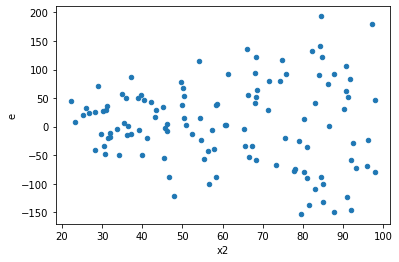

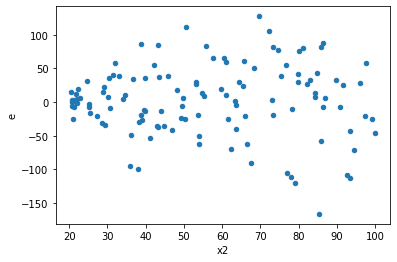

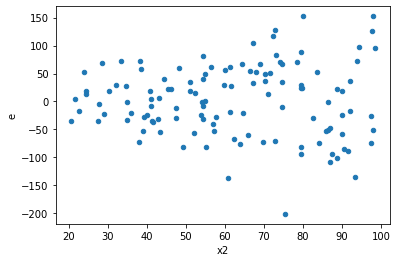

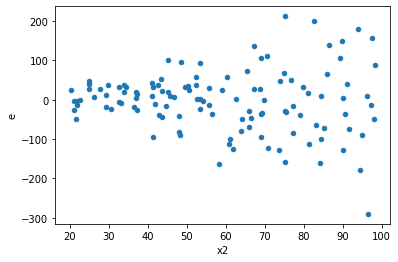

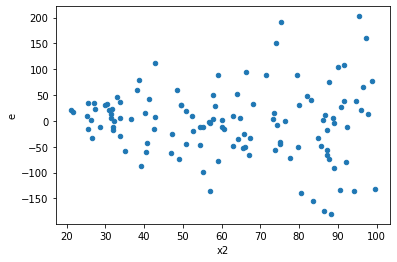

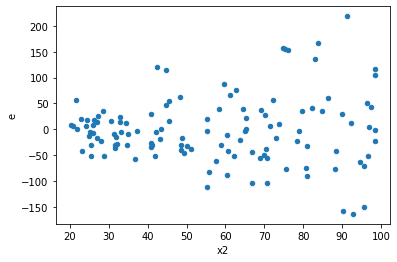

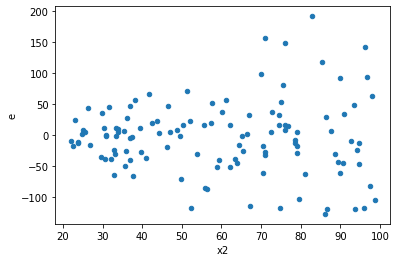

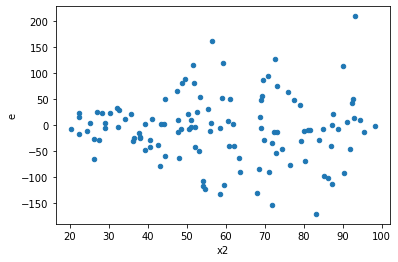

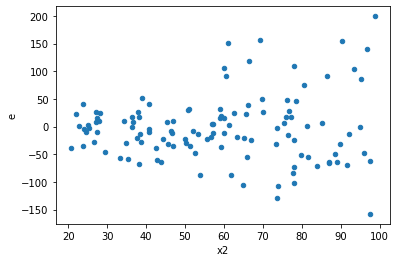

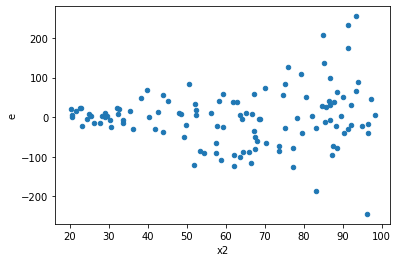

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,68.0,48.0,201002.78548818798,397417.9188354295,2955.9233160027643,8279.539975738115,2.8009995830792964,0.0002612064689646587,0.9998693967655177,0.00013060323448232936,Reject001=0 : Heteroscedasticity
1.0,73.0,43.0,140436.56153865097,170931.6913917065,1923.7885142280954,3975.1556137606162,2.0663163255008907,0.011395186808251356,0.9943024065958743,0.005697593404125678,Reject001=1 : Homoscedasticity
4.0,50.0,66.0,226996.65893229775,300136.9652136115,4539.933178645955,4547.529775963811,1.001673283949109,0.9852397479910051,0.5073801260044974,0.49261987399550256,Reject001=1 : Homoscedasticity
5.0,60.0,56.0,109028.21065501378,376786.272057661,1817.1368442502296,6728.326286743946,3.7027075357773214,1.9005716984654697e-06,0.9999990497141508,9.502858492327348e-07,Reject001=0 : Heteroscedasticity
6.0,67.0,49.0,138546.60718578935,246222.24916808514,2067.8598087431246,5024.943860573166,2.4300215320821965,0.0014202956323066118,0.9992898521838467,0.0007101478161533059,Reject001=0 : Heteroscedasticity
8.0,61.0,55.0,88604.59545671886,317657.93053924566,1452.5343517494896,5775.598737077194,3.976221787884627,6.298025632123228e-07,0.9999996850987184,3.149012816061614e-07,Reject001=0 : Heteroscedasticity
9.0,44.0,72.0,85131.7374980046,508869.96402968914,1934.812215863741,7067.638389301238,3.6528807970886703,1.0851562708413809e-06,0.9999994574218646,5.425781354206904e-07,Reject001=0 : Heteroscedasticity
11.0,63.0,53.0,121134.38519189898,310912.87264838885,1922.7680189190314,5866.280616007337,3.0509559958800043,5.249884458846665e-05,0.9999737505777058,2.6249422294233327e-05,Reject001=0 : Heteroscedasticity
13.0,63.0,53.0,192053.06226072134,333939.60452501377,3048.4613057257357,6300.747255188939,2.066861482989676,0.007388710686821343,0.9963056446565893,0.0036943553434106713,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,68.0,48.0,201002.78548818798,397417.9188354295,2955.9233160027643,8279.539975738115,2.8009995830792964,0.0002612064689646587,Reject001=0 : Heteroscedasticity
1.0,73.0,43.0,140436.56153865097,170931.6913917065,1923.7885142280954,3975.1556137606162,2.0663163255008907,0.011395186808251356,Reject001=1 : Homoscedasticity
2.0,72.0,44.0,336462.79625219724,137599.65049089867,4673.094392391628,3127.2647838840608,0.6692064232589934,0.128800079532924,Reject001=1 : Homoscedasticity
3.0,54.0,62.0,505646.61115248397,196350.1665331875,9363.826132453407,3166.938169890121,0.33820984340087856,7.660205859033915e-05,Reject001=0 : Heteroscedasticity
4.0,50.0,66.0,226996.65893229775,300136.9652136115,4539.933178645955,4547.529775963811,1.001673283949109,0.9852397479910051,Reject001=1 : Homoscedasticity
5.0,60.0,56.0,109028.21065501378,376786.272057661,1817.1368442502296,6728.326286743946,3.7027075357773214,1.9005716984654697e-06,Reject001=0 : Heteroscedasticity
6.0,67.0,49.0,138546.60718578935,246222.24916808514,2067.8598087431246,5024.943860573166,2.4300215320821965,0.0014202956323066118,Reject001=0 : Heteroscedasticity
7.0,53.0,63.0,258692.35574318713,214350.21278423857,4880.987844211078,3402.384329908549,0.697068798059767,0.1786371924633759,Reject001=1 : Homoscedasticity
8.0,61.0,55.0,88604.59545671886,317657.93053924566,1452.5343517494896,5775.598737077194,3.976221787884627,6.298025632123228e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    621
Reject001=1 : Homoscedasticity      379
Name: Result_test, dtype: int64